In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from utils import *
import scipy.stats
import seaborn as sns
from ipywidgets import interact, interactive, FloatProgress, IntProgress
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, confusion_matrix

In [2]:
#data_filename = 'saves/ret-and-ewma-2009-2012-EURGBP-EURJPY-EURUSD-GBPCHF-GBPJPY-GBPUSD-USDJPY-XAGUSD-XAUGBP-XAUUSD.h5'
data_filename = 'saves/ret-and-ewma-with-inverse-2009-2012-EURGBP-EURJPY-EURUSD-GBPCHF-GBPJPY-GBPUSD-USDJPY-XAGUSD-XAUGBP-XAUUSD.h5'

### TODO: create random dataset. and save to file.

In [3]:
ds = pd.read_hdf(data_filename)

In [4]:
#ds = ds[:10000]

In [5]:
print len(ds)*1e-6, "M"
ds = ds.dropna()
print len(ds)*1e-6, "M"
ds.tail(5).transpose()

27.693378 M
27.096818 M


ts,2012-12-31 16:53:00,2012-12-31 16:55:00,2012-12-31 16:56:00,2012-12-31 16:57:00,2012-12-31 16:58:00
px,-338.444443,-339.635147,-340.532895,-338.695321,-338.564295
ret-2,0.040195,-0.308724,-0.452095,0.215855,0.429565
ewma4-2,-0.051264,-0.182384,-0.265845,0.011099,0.082949
ret-4,-0.065074,-0.213983,-0.306028,-0.070474,-0.019773
ewma8-4,-0.154339,-0.198923,-0.252794,-0.150236,-0.080174
ret-8,-0.356825,-0.318070,-0.230879,-0.123721,-0.059991
ewma16-8,-0.200963,-0.222636,-0.253744,-0.223404,-0.193342
ret-16,-0.292890,-0.380448,-0.415709,-0.278849,-0.276511
ewma32-16,-0.172157,-0.187197,-0.206912,-0.204109,-0.199101
ret-32,-0.226588,-0.285190,-0.307424,-0.244226,-0.190374


In [6]:
ds.head(10000).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
px,10000.0,-153.806459,26.505966,-212.641187,-170.760886,-153.916107,-138.966972,-53.523985
ret-2,10000.0,0.002272,0.279683,-0.993927,-0.154586,-0.005304,0.148217,0.988508
ewma4-2,10000.0,0.003597,0.184424,-0.952092,-0.095578,-0.003196,0.094517,0.838695
ret-4,10000.0,0.003399,0.276925,-0.994830,-0.162448,-0.006703,0.155952,0.966327
ewma8-4,10000.0,0.005591,0.175865,-0.934212,-0.088692,-0.002612,0.092272,0.750881
ret-8,10000.0,0.006055,0.274259,-0.988016,-0.155715,-0.007487,0.147698,0.942809
ewma16-8,10000.0,0.008298,0.174017,-0.882950,-0.086272,-0.002890,0.093574,0.687030
ret-16,10000.0,0.009758,0.273685,-0.982051,-0.148452,-0.008796,0.158111,0.904218
ewma32-16,10000.0,0.012316,0.173965,-0.639816,-0.081730,-0.003245,0.097701,0.688208
ret-32,10000.0,0.014646,0.277827,-0.903641,-0.147785,-0.003725,0.166944,0.922232


In [7]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [8]:
#random sample of points
n_sample = 2000
sample_idx = np.random.choice(len(ds), n_sample)

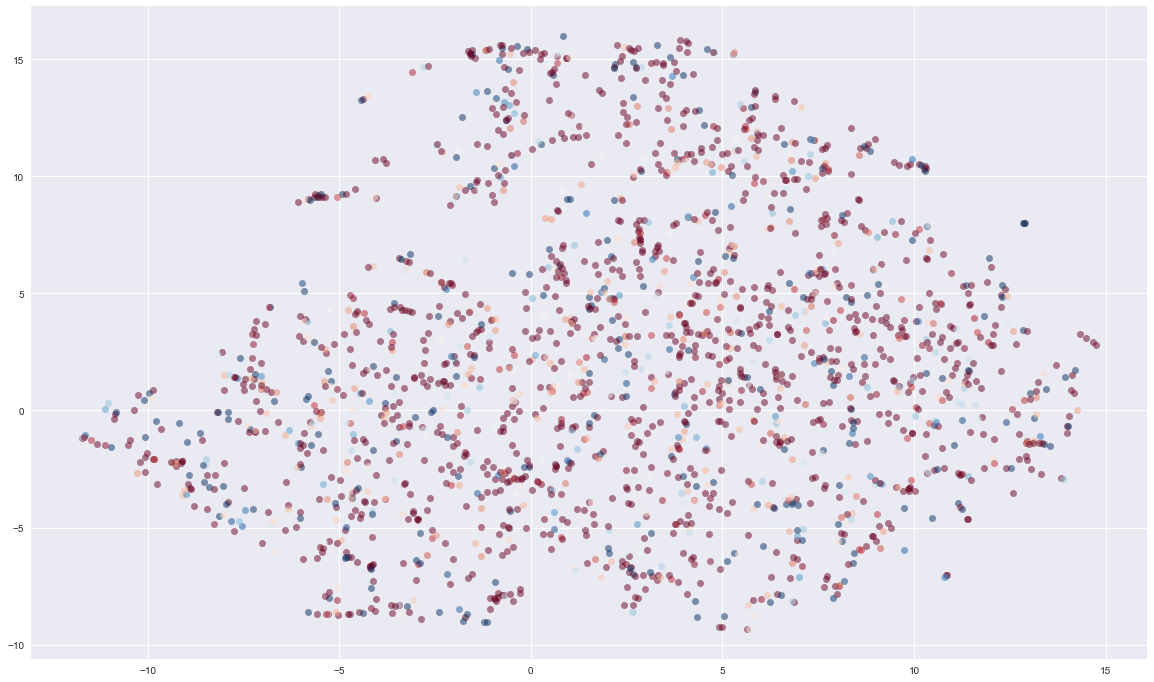

In [9]:
FIGSIZE=(20,12)
X = ds.drop('px', axis=1).fillna(0.0)
y = ds['px'].diff().shift(-10)
xt = tsne.fit(X.ix[sample_idx])

plt.figure(figsize=FIGSIZE)
c = y.ix[sample_idx]/y.ix[sample_idx].std()
for i in range(n_sample):    
    plt.plot(xt.embedding_[i,0], xt.embedding_[i,1], 'o', color=plt.cm.RdBu(c[i]), alpha=0.5)

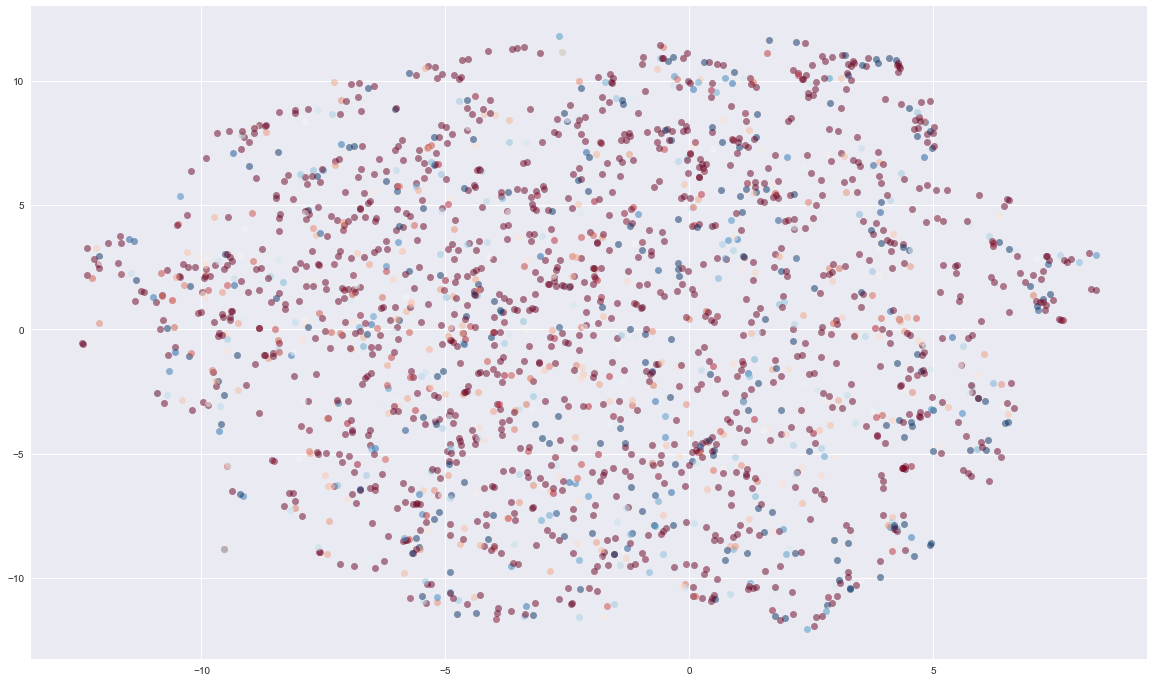

In [10]:
FIGSIZE=(20,12)
X = ds.drop('px', axis=1).fillna(0.0)
y = ds['px'].diff().shift(-1)
xt = tsne.fit(X.ix[sample_idx])

plt.figure(figsize=FIGSIZE)
c = y.ix[sample_idx]/y.ix[sample_idx].std()
for i in range(n_sample):    
    plt.plot(xt.embedding_[i,0], xt.embedding_[i,1], 'o', color=plt.cm.RdBu(c[i]), alpha=0.5)

In [11]:
n_categories = 5
X = ds.drop('px', axis=1).fillna(0.0)
n = len(X)
y = ds['px'].diff().shift(-10).fillna(0.0)

ntrain = int(0.95*n)
X_train = X[0:ntrain]
X_test = X[ntrain:]
y_train = y[0:ntrain]
y_train = y_train -y_train.mean()
Y_train = pd.qcut(y_train,n_categories, labels=False)

y_test = y[ntrain:]
Y_test = pd.qcut(y_test,n_categories, labels=False)



In [12]:
del ds

In [13]:
print "train"
print "X", X_train.shape
print "Y", Y_train.shape

print "test"
print "X", X_test.shape
print "Y", Y_test.shape

train
X (25741977, 16)
Y (25741977,)
test
X (1354841, 16)
Y (1354841,)


In [14]:
X_train.head(3)

,ret-2,ewma4-2,ret-4,ewma8-4,ret-8,ewma16-8,ret-16,ewma32-16,ret-32,ewma64-32,ret-64,ewma128-64,ret-128,ewma256-128,ret-256,ewma512-256
ts,,,,,,,,,,,,,,,,
2009-01-09 03:13:00,-0.008149,0.063396,0.247107,0.069255,0.109634,0.045036,0.044090,0.006208,-0.049679,-0.056660,-0.000067,-0.097187,-0.221346,-0.071935,-0.189444,-0.034659
2009-01-09 03:14:00,-0.221543,-0.078350,-0.059805,0.003980,-0.035465,0.024196,-0.032630,0.001799,-0.121862,-0.056270,-0.038427,-0.096763,-0.238502,-0.072094,-0.201824,-0.034844
2009-01-09 03:15:00,-0.354783,-0.163669,-0.261793,-0.067214,-0.035470,-0.007545,-0.109829,-0.008112,-0.175512,-0.057914,-0.077066,-0.096972,-0.264136,-0.072447,-0.208101,-0.035091


In [15]:
Y_train.head()

ts
2009-01-09 03:13:00    4
2009-01-09 03:14:00    0
2009-01-09 03:15:00    0
2009-01-09 03:16:00    2
2009-01-09 03:17:00    4
Name: px, dtype: int64

----------------------

---

In [16]:
import os
import keras
SAVE_MODEL_EPOCHS = 5
class Experiment(keras.callbacks.Callback):

    def __init__(self, run_id, epoch_count=0, tl = [], dl = []):
        self.run_id = run_id
        self.train_losses = tl        
        self.dev_losses = dl
        self.epoch_count = epoch_count
        self.last_model_file = None
        
    def on_epoch_end(self, epoch, logs):
        print logs
        self.train_losses.append(logs['loss'])
        self.dev_losses.append(logs['val_loss'])
        
        self.epoch_count+=1
        if self.epoch_count % SAVE_MODEL_EPOCHS == 0:
            self.last_model_file = self.model_filename(self.run_id, self.epoch_count)
            self.model.save(self.last_model_file)
            self.save()
            
    def save(self):
        np.savez(
            self.exp_filename(run_id), 
            run_id=self.run_id, 
            epoch_count=self.epoch_count, 
            tl=np.array(self.train_losses), 
            dl=np.array(self.dev_losses),
            last_model_file=self.last_model_file)
        
    @staticmethod
    def exp_filename(run_id):
        return "saves/experiment_" + run_id + ".npz"

    @staticmethod
    def model_filename(run_id, epoch):
        return 'saves/model-{}-{}.h5'.format(run_id, epoch)
    
    @classmethod 
    def load(cls, run_id):
        fname = cls.exp_filename(run_id)
        print "loading from file:", fname
        npz = np.load(fname)
        run_id = str(npz['run_id'])
        epoch_count = int(npz['epoch_count'])
        tl = list(npz['tl'])
        dl = list(npz['dl'])
        last_model_file = str(npz['last_model_file'])
        experiment = Experiment(run_id, epoch_count, tl, dl)
        experiment.last_model_file = last_model_file
        return experiment
    
    @classmethod
    def create_or_load(cls, run_id):
        fname = cls.exp_filename(run_id)
        if os.path.exists(fname):
            prog = cls.load(run_id)
            print "loaded progress: ", prog.run_id, "training epochs:", prog.epoch_count
            return prog
        else:
            print "creating new progress for run id:", run_id
            return Experiment(run_id)
        

Using Theano backend.
Using gpu device 0: GeForce GTX 580 (CNMeM is disabled, cuDNN not available)


In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.utils import np_utils


In [18]:
n_features = X_train.shape[1]
print "n_features", n_features

n_features 16


In [19]:
def build_model(n_features, loss_function):
    model = Sequential()
    model.add(Dense(500, input_dim=n_features, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu', init='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim=n_categories, activation='softmax', init='he_normal'))

    model.compile(loss=loss_function, optimizer='adam')
    return model

In [20]:
model = build_model(n_features, 'mean_squared_error')

In [21]:
run_id = "norm-price-ewma-mse-with-inverse-4x500-5cat"
progress = Experiment.create_or_load(run_id)

creating new progress for run id: norm-price-ewma-mse-with-inverse-4x500-5cat


In [ ]:
epochs=100
batch_size=80000
hist=model.fit(
    X_train.as_matrix(), np_utils.to_categorical(Y_train),
    batch_size=batch_size, nb_epoch=epochs, validation_split=0.01, verbose=2,
    callbacks=[progress],
    initial_epoch=progress.epoch_count)

plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

Train on 25484557 samples, validate on 257420 samples
Epoch 1/100
{'loss': 0.15910588038430037, 'val_loss': 0.1585132386667098}
217s - loss: 0.1591 - val_loss: 0.1585
Epoch 2/100
{'loss': 0.15821867305284742, 'val_loss': 0.15815295083022102}
217s - loss: 0.1582 - val_loss: 0.1582
Epoch 3/100
{'loss': 0.15813552179357712, 'val_loss': 0.1580402701745805}
217s - loss: 0.1581 - val_loss: 0.1580
Epoch 4/100
{'loss': 0.15807985516761036, 'val_loss': 0.15784898245865328}
217s - loss: 0.1581 - val_loss: 0.1578
Epoch 5/100
{'loss': 0.15802999529249628, 'val_loss': 0.15769600107595549}
217s - loss: 0.1580 - val_loss: 0.1577
Epoch 6/100
{'loss': 0.15799592122556078, 'val_loss': 0.15778528878983525}
217s - loss: 0.1580 - val_loss: 0.1578
Epoch 7/100
{'loss': 0.15796716845733538, 'val_loss': 0.15756881990944735}
217s - loss: 0.1580 - val_loss: 0.1576
Epoch 8/100
{'loss': 0.15794630019523098, 'val_loss': 0.15756463683014585}
217s - loss: 0.1579 - val_loss: 0.1576
Epoch 9/100
{'loss': 0.1579295542784

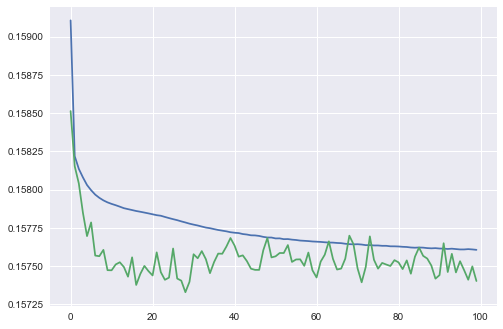

In [23]:
plt.plot(progress.train_losses)
plt.plot(progress.dev_losses)

[[ 63745  47180  76323  33758  49963]
 [ 31076  47423 126037  39591  26841]
 [ 24335  44146 141395  38763  22329]
 [ 29701  46636 126029  40441  28161]
 [ 59777  45551  77015  35463  53162]]
0.255503044269
0.242470786965


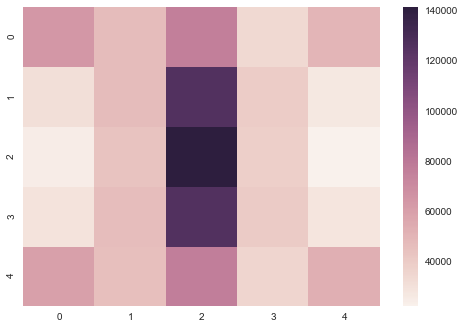

In [24]:
Y_pred = model.predict(X_test.as_matrix(), batch_size=2000, verbose=2)
pred_classes = np_utils.categorical_probas_to_classes(Y_pred)
conf_matrix =  confusion_matrix(Y_test, pred_classes)
print conf_matrix
print accuracy_score(Y_test,pred_classes)
print f1_score(Y_test,pred_classes, average='weighted')
sns.heatmap(conf_matrix)